# A simple notebook to compute some statistics about theses in DiVA examined by G. Q. Maguire Jr.

The program fetches data from DiVA as a feed, using the URL shown as 'url' below.

Note that a lot of replacements are done to the string returned by DiVA due to a bit of LaTeX in the abstracts (that should not be there as this should have been turned to HTML) and the problem of newlines in the abstracts.

In [1]:
# compute statistics over thesis data from DiVA Start
# libraries
import json
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
from datetime import date

# define a function to computer lower case Roman numeras from an integer
def int_to_roman(num):
    res = ""
    table = [
        (1000, "m"),
        (900, "cm"),
        (500, "d"),
        (400, "cd"),
        (100, "c"),
        (90, "xc"),
        (50, "l"),
        (40, "xl"),
        (10, "x"),
        (9, "ix"),
        (5, "v"),
        (4, "iv"),
        (1, "i"),
    ]
    for cap, roman in table:
        d, m = divmod(num, cap)
        res += roman * d
        num = m
    return res

# Using the above function fill a dict with the lower case Roman numerals from 0 to 499
roman_table=dict()
for i in range(0,500):
    roman_table[int_to_roman(i)]=i


# URL of the DiVA feed
# The starting year is arbitrarly fixed to 1990 - as I had no degree projects a KTH prior to this.
current_year = date.today().year
examiner='maguire'
# the maximum number of theses was arbitrarily set to 5000
url='https://kth.diva-portal.org/smash/export.jsf?format=csl_json&addFilename=true&aq=[[{"examiner":[' +f"{examiner}"+ ']}]]&aqe=[]&aq2=[[{"dateIssued":{"from":"1990","to":'+f"{current_year}" + '}},{"publicationTypeCode":["studentThesis"]}]]&onlyFullText=false&noOfRows=5000&sortOrder=title_sort_asc&sortOrder2=title_sort_asc'

req = urllib.request.Request(url)
resource=urllib.request.urlopen(req)
data_str=resource.read().decode(resource.headers.get_content_charset())

# do some data cleanup
data_str=data_str.replace('\n', '\\n')
data_str=data_str.replace('\\hbox', '\\\\hbox')
data_str=data_str.replace('\\(', '(')
data_str=data_str.replace('\\)', ')')
data_str=data_str.replace('\\approx', '~')
data_str=data_str.replace('\\%', '%')
data_str=data_str.replace('\t', '')
data_str=data_str.replace('\\Omega', 'Omega')

data = json.loads(data_str)
df = pd.DataFrame(data)
#print(df.head())

for idx, row in df.iterrows():
    pages=row['number-of-pages']
    if isinstance(pages, str) and ',' in pages:
        #print(pages)
        preface, body = pages.split(',')
        df.loc[idx, 'total_pages']=roman_table[preface]+int(body)
    elif isinstance(pages, str) and '.' in pages:
        print(pages)
        preface, body = pages.split('.')
        df.loc[idx, 'total_pages']=roman_table[preface]+int(body)
    elif isinstance(pages, str):
        df.loc[idx, 'total_pages']=int(pages)
    else:
        df.loc[idx, 'total_pages']=0


# show the total_pages values as a plot
bins=[]
for b in range(0, round(int(df['total_pages'].max()+50), -1), 10):
    bins.append(b)
print("total_pages mas={}".format(df['total_pages'].max()))
#df[['total_pages']] = df[['total_pages']].apply(pd.to_numeric)
#hist_tp=plt.hist(df['total_pages'], bins=bins)
freq_df=pd.DataFrame(df['total_pages'].value_counts(bins=bins))
freq_df=freq_df.reset_index()
freq_df.columns=['number of pages', 'count']
for idx, row in freq_df.iterrows():
 	freq_df.loc[idx, 'base']=row['number of pages'].left

freq_df.sort_values(by='base', ignore_index=True, ascending=True)
freq_df = freq_df.drop('number of pages', axis=1)


xiii.48
total_pages mas=455.0


From the histogram below, we can see that there are a number of theses that did not have a length in DiVA and these have been interpreted has having zero, i.e., 0, lenght. One can easily see that the distribut is pretty well 

In [2]:
_deepnote_run_altair(freq_df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"bin":false,"sort":{"order":"ascending","encoding":"x"},"type":"quantitative","field":"base","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"count","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [3]:
# Frequency
stats_df = df \
.groupby('total_pages') \
['total_pages'] \
.agg('count') \
.pipe(pd.DataFrame) \
.rename(columns = {'total_pages': 'frequency'})

# PDF
stats_df['pdf'] = stats_df['frequency'] / sum(stats_df['frequency'])

# CDF
stats_df['cdf'] = stats_df['pdf'].cumsum()
stats_df = stats_df.reset_index()
stats_df

,total_pages,frequency,pdf,cdf
0,0.0,36,0.061538,0.061538
1,16.0,1,0.001709,0.063248
2,18.0,2,0.003419,0.066667
3,24.0,3,0.005128,0.071795
4,26.0,1,0.001709,0.073504
...,...,...,...,...
131,251.0,1,0.001709,0.993162
132,269.0,1,0.001709,0.994872
133,271.0,1,0.001709,0.996581
134,377.0,1,0.001709,0.998291


In [4]:
_deepnote_run_altair(stats_df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"total_pages","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"pdf","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [5]:
_deepnote_run_altair(stats_df, """{"data":{"name":"placeholder"},"mark":{"type":"line","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"total_pages","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"cdf","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [6]:
_deepnote_run_altair(df, """{"data":{"name":"placeholder"},"mark":{"type":"bar","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"id","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"total_pages","scale":{"type":"linear","zero":true}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

In [7]:
_deepnote_run_altair(df, """{"data":{"name":"placeholder"},"mark":{"type":"point","tooltip":true},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"nominal","field":"id","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"total_pages","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"nominal","field":"","scale":{"type":"linear","zero":false}}}}""")

alt.Chart(...)

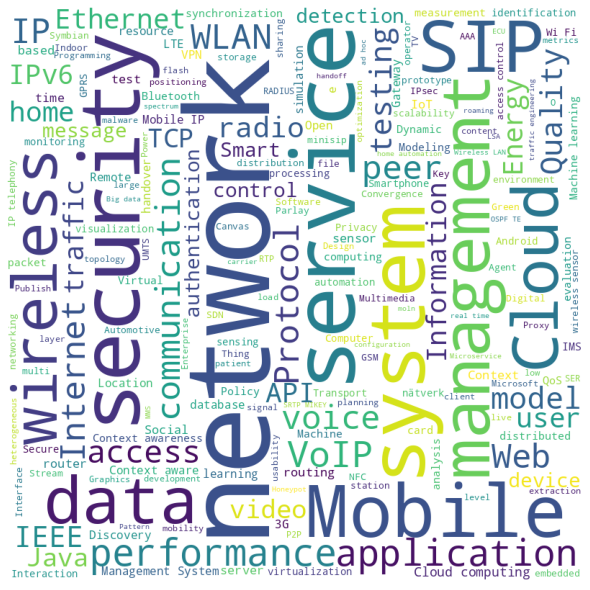

In [20]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.add('nan')

for val in df['keyword']:
    val = str(val)
    # split the value
    tokens = val.split(';')
    number_of_tokens=len(tokens)
    # choose the first half of the tokens, as they are probably in the same language
    if number_of_tokens % 2 == 0:
        tokens=tokens[0:int(number_of_tokens/2)]
    # Converts each token into lowercase
    for i in range(len(tokens)):
        if any(map(str.isupper, tokens[i])):
            tokens[i] = tokens[i]
        else:
            tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7ff901d2-2523-45e6-ad7c-a0ffb7dec8be' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>